In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,3,Merlot,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


In [5]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [6]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


## Checking for any duplicate rows in the dataset and discarding them if any.

In [7]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (1, 11)


In [8]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [9]:
print(df.isnull().sum())

fixed acidity           1
citric acid             2
residual sugar          0
chlorides               1
total sulfur dioxide    4
density                 3
sulphates               0
alcohol                 0
type                    3
Taste                   5
quality                 0
dtype: int64


In [10]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


<br>

## Plotting the Dataset

### Histogram is a data visualization technique that is used to visualize generally one variable

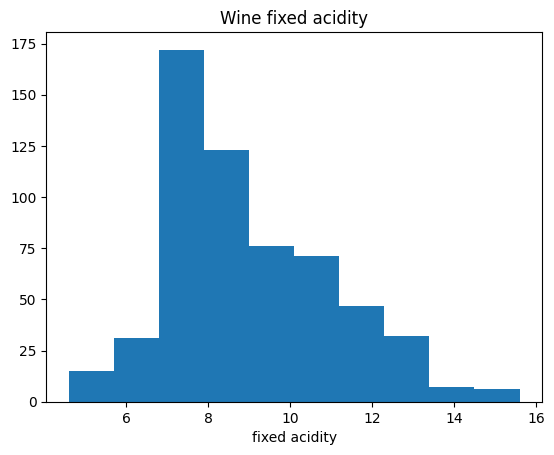

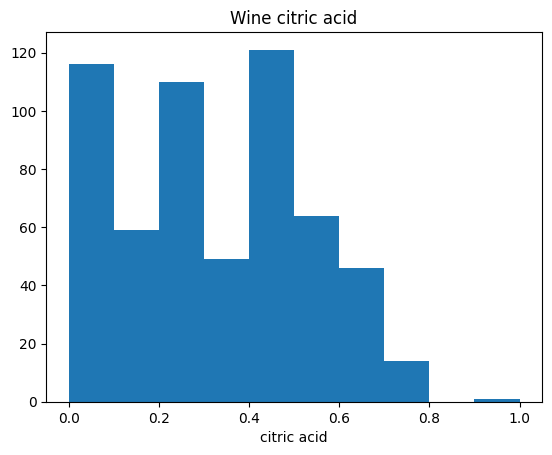

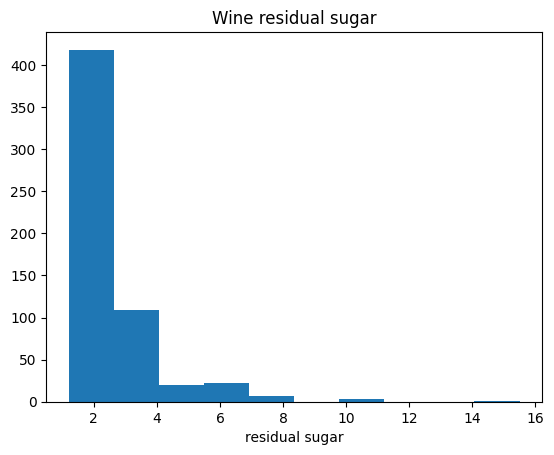

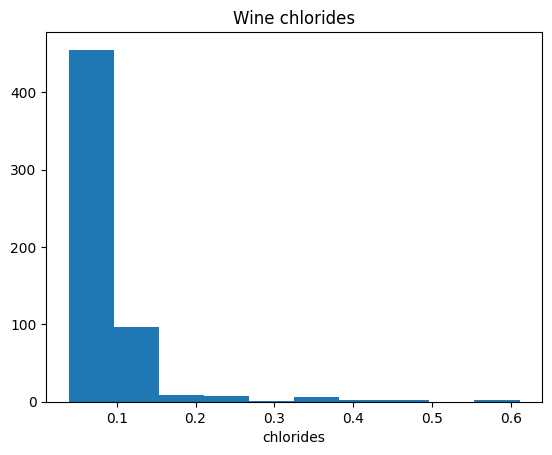

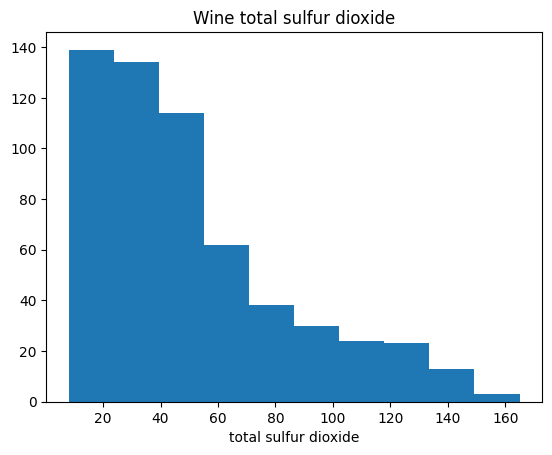

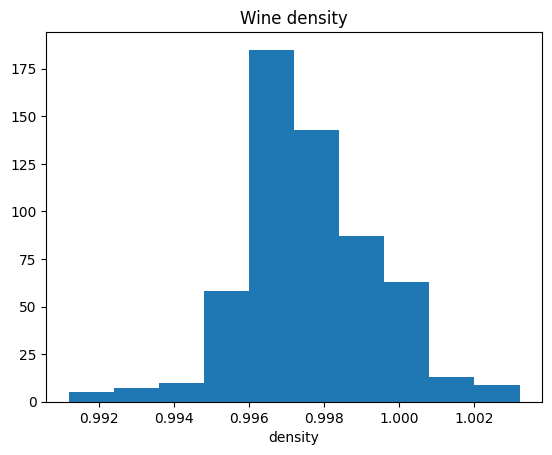

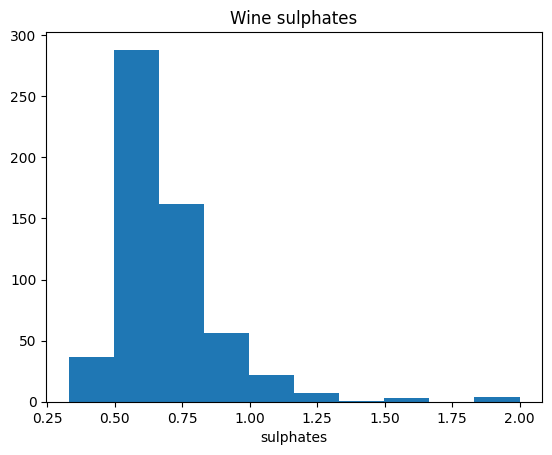

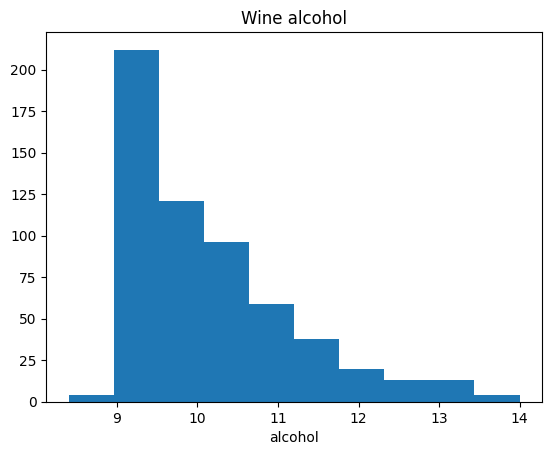

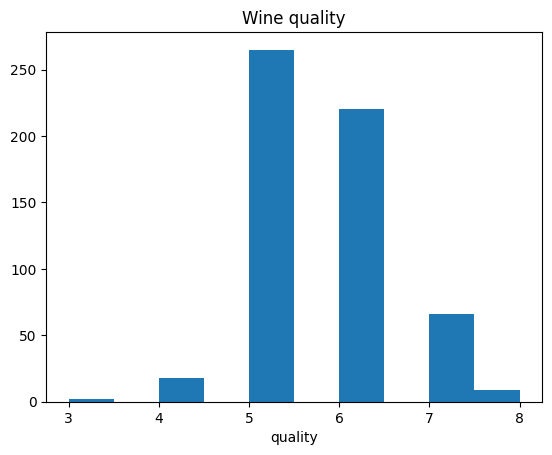

In [11]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Wine '+str(i))
        plt.hist(col)
        plt.show()



## Distribution of nominal variables using count plot
#### A count plot is similar to a histogram, but for categorical variables instead of quantitative ones. It's a type of "categorical plot" in Seaborn, which are used to compare different groups.

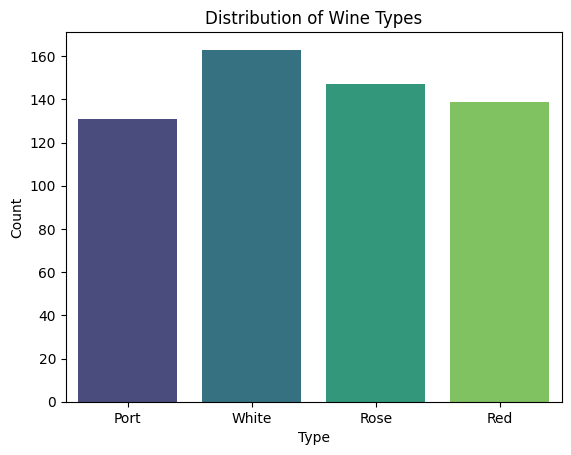

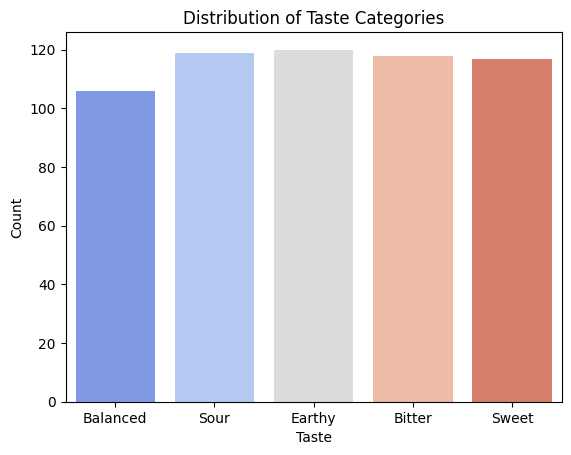

In [12]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap
#### Heatmap is generally used to show the correlation of all the numeric variable to all the other numeric variables.

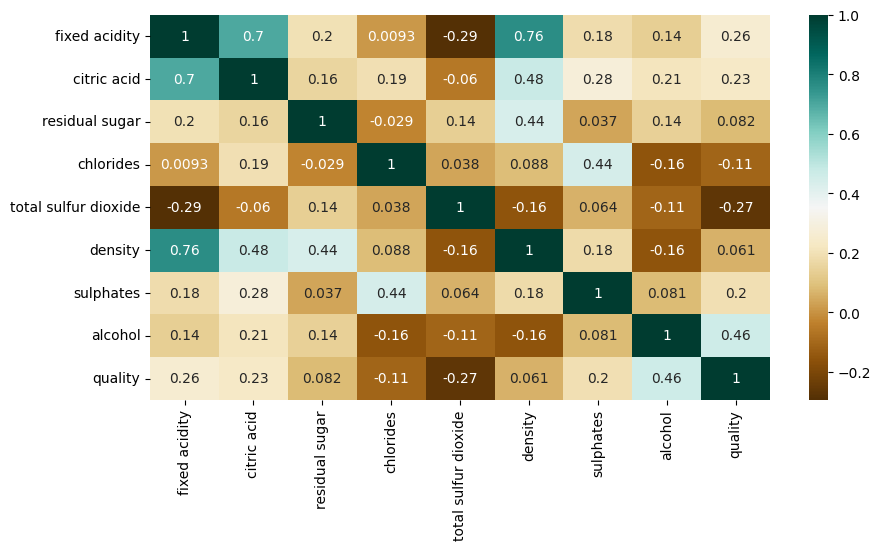

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

<br>

### Scatter Plot
#### Useful for visualizing the relationship between two continuous variables.


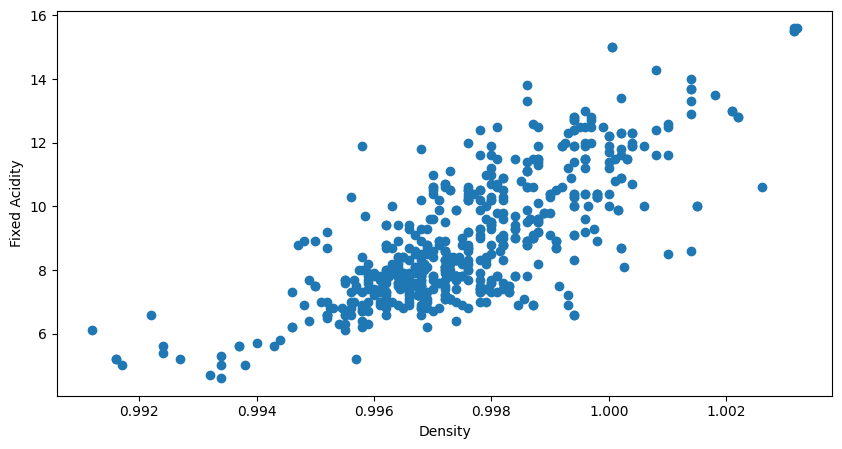

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

#### We can see a slight positive corelation between fixed acidity and density.

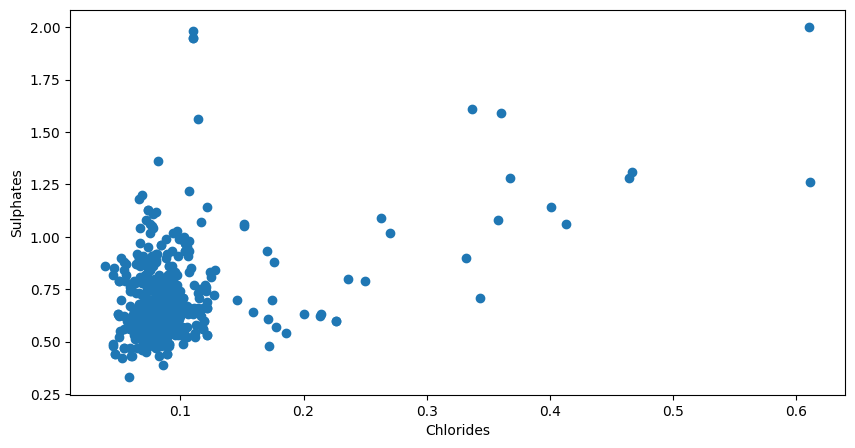

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['chlorides'], df['sulphates'])
ax.set_xlabel('Chlorides')
ax.set_ylabel('Sulphates')
plt.show()

#### There is no corelation between Sulphates and Chlorides.

## Box Plot
#### Box Plot is a graphical method to visualize data distribution for gaining insights and making informed decisions. Box plot is a type of chart that depicts a group of numerical data through their quartiles. Box plot is a graphical representation of the distribution of a dataset. It displays key summary statistics such as the median, quartiles, and potential outliers in a concise and visual manner. By using Box plot you can provide a summary of the distribution, identify potential and compare different datasets in a compact and visual manner.

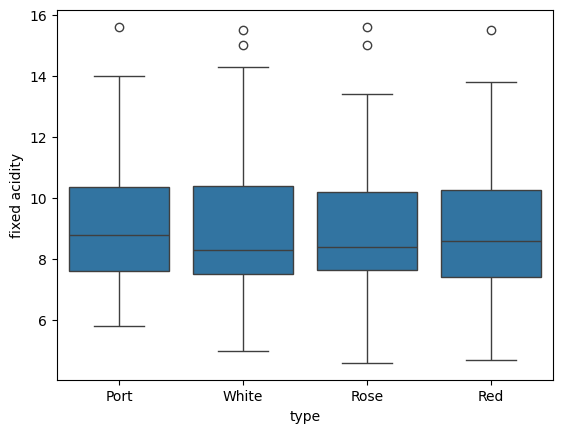

In [17]:

variables = ['fixed acidity', 'residual sugar', 'chlorides', 'sulphates', 'alcohol']


sns.boxplot(x=df['type'], y='fixed acidity')
plt.show()

## Voilin Plot
#### A violin plot uses density curves to show the distribution of numeric data. The width of each curve represents the approximate frequency of data points in each region.

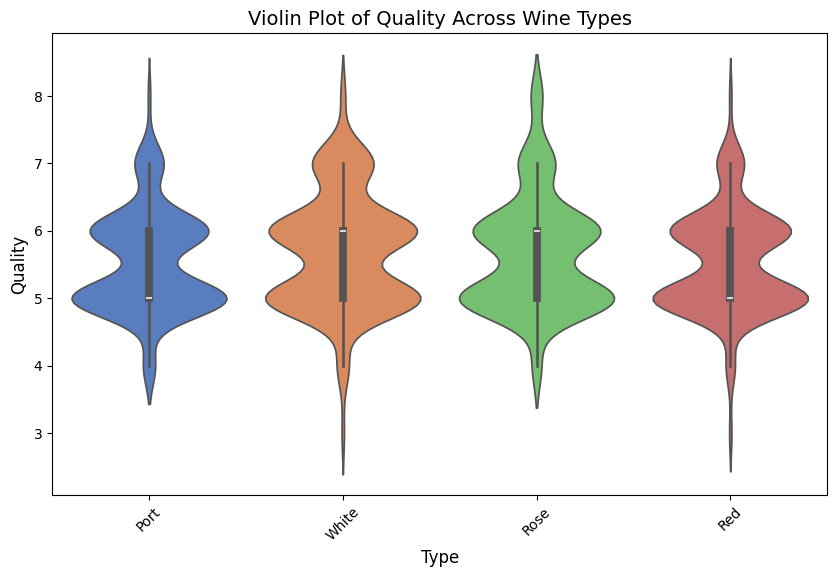

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='type', y='quality', palette='muted')
plt.title('Violin Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The violin plot shows that most wines, regardless of type (Port, White, Rose, Red), have quality scores clustered around 5–6. Rose wines exhibit the most consistent distribution, while White and Red wines show more variability. Extreme quality scores (low or high) are less frequent across all wine types.

## Swarm Plot
#### A swarm plot is a categorical scatter plot that uses dots to represent data points, arranged so that they don't overlap. The arrangement makes the plot look like a swarm of bees.

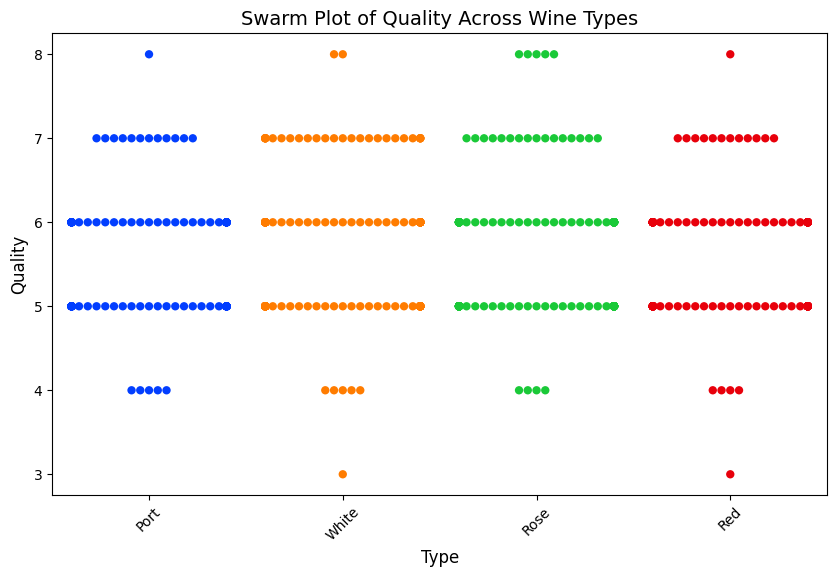

In [28]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='type', y='quality', palette='bright', size=6)
plt.title('Swarm Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The swarm plot shows the distribution of wine quality scores across types (Port, White, Rose, Red). Most wines cluster around mid-range scores (5–6) for all types. Outliers are visible at extreme scores, such as quality 3 or 8, indicating some variability. Rose wines appear more consistent, while others vary slightly more.

#